##Рубежный контроль №1 

Курьянов А.И.
Группа: ИУ5-22М 

Вариант №7

Задание №1 (7) Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as ss
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('Prolific_Inventor.csv', encoding='ISO-8859-1')
df['Inventors / Patent'].isnull().sum()

15

In [ ]:
def impute_column(dataset, column, strategy_param):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=None)
    all_data = imputer.fit_transform(temp_data)
    dataset[[column]] = all_data
    return dataset

In [ ]:
all_data = impute_column(df, 'Inventors / Patent', 'median')
all_data['Inventors / Patent'].isnull().sum()

0

Задание №2 (27) Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Inventor             333 non-null    object 
 1   Patents              333 non-null    int64  
 2   Residence            333 non-null    object 
 3   Patent Years         333 non-null    object 
 4   Years                333 non-null    float64
 5   Patents / Year       333 non-null    int64  
 6   Inventors / Patent   333 non-null    float64
 7   Majority assignment  333 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 20.9+ KB


In [ ]:
from enum import Enum
class OutlierBoundaryType(Enum):
    QUANTILE = 2

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    ss.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()


# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary   

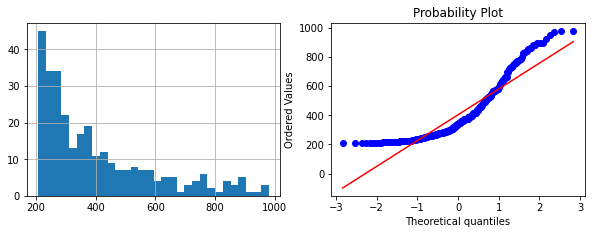

In [ ]:
for obt in OutlierBoundaryType:
  # Вычисление верхней и нижней границы
  lower_boundary, upper_boundary = get_outlier_boundaries(df, 'Patents', obt)
  # Флаги для удаления выбросов
  outliers_temp = np.where(df['Patents'] > upper_boundary, True, np.where(df['Patents'] < lower_boundary, True, False))
  # Удаление данных на основе флага
  data_trimmed = df.loc[~(outliers_temp), ]  
  title = 'Поле-{}, метод-{}, строк-{}'.format('Patents', obt, data_trimmed.shape[0])
  diagnostic_plots(data_trimmed, 'Patents', title)